# SymPy
**SymPy** is a Computer Algebra System (CAS) for Python. It does symbolic computation instead of numeric computation. This means that mathematical objects are represented exactly, not approximately as in the case of numerical representation.

Take the example of $\sqrt{8}$. When calculated numerically, we get the approximate answer 2.82842712475. But in SymPy it is represented as $2 \sqrt{2}$. Further, performing operations on such representations will continue to retain accuracy. Note that $\frac{\sqrt{8}}{\sqrt{3}}$ is simplified to $\frac{2 \sqrt{6}}{3}$, retaining full accuracy. You can numerically evaluate any expression with the **`N()`** function in SymPy.

In [1]:
from sympy import *
import math

x, y, z, t = symbols('x y z t')          # Symbols representing real numbers
k, m, n = symbols('k m n', integer=True) # Symbols representing integers
f, g, h = symbols('f g h', cls=Function) # Symbols repesenting function names
init_printing()

print math.sqrt(8)
print sqrt(8)
print math.sqrt(8) / math.sqrt(3)
print sqrt(8) / sqrt(3)
print N(sqrt(8) / sqrt(3))  # Numerical evaluation
print N(sqrt(8. / 3.))

2.82842712475
2*sqrt(2)
1.63299316186
2*sqrt(6)/3
1.63299316185545
1.63299316185545


## Numerical Simplification

In [2]:
print nsimplify(0.1)
print nsimplify(6.28, [pi], tolerance=0.01)
print nsimplify(pi, tolerance=0.1)
print nsimplify(pi, tolerance=0.001)

1/10
2*pi
22/7
355/113


## Algebra
SymPy can handle algebraic expressions, simplify them and evaluate them.

In [3]:
eq = ((x+y)**2 * (x+1))
eq

In [4]:
expand(eq)

You can substitute a numerical value for any of the symbols and simplify the expression. The method to do this is **`subs()`**. It takes two arguments, the symbol and the numerical value it is to assume. If an expression has more than one symbol, substitution must be done one symbol at a time.

In [5]:
eq.subs(x, 1).subs(y,1)

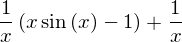

In [6]:
a = 1/x + (x*sin(x) - 1)/x
a

In [7]:
N(a.subs(x, 1))

## Integral Calculus

SymPy performs integration symbolically, like you would if you were doing so by hand rather than numerically.

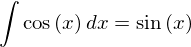

In [8]:
a = Integral(cos(x), x)
Eq(a, a.doit())

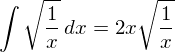

In [9]:
b = Integral(sqrt(1/x), x)
Eq(b, b.doit())

Here is how we can evaluate the definite integral $\int_0^{\infty} e^{-x} dx$

In [40]:
b = Integral(x**2+2*x+3, x)
Eq(b, b.doit())
integrate(b, (x, 0, 1))

In [10]:
integrate(exp(-x), (x, 0, oo))

Here is the definite integral $\int_{-\infty}^{\infty} -x^2 - y^2 dx$

In [11]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

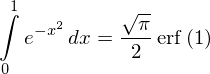

In [12]:
c = Integral(exp(-x**2), (x, 0, 1))
Eq(c, c.doit())

In [13]:
N(c.doit())

## Differential Calculus

SymPy can also perform differentiation symbolically. Derivative of $y = x^2 + 3x - \frac{1}{2}$ is $y' = 2x + 3$. Substituting $x=2$ in the derivative results in the numerical value $y'(2) = 7$.

In [14]:
s = "x**2 + 3*x - 1/2"
c = sympify(s)
print c
d = diff(c)
print d
d.subs(x, 2)

x**2 + 3*x - 1/2
2*x + 3


It is possible to differentiate a function multiple times and obtain the second or higher derivatives.

In [15]:
print diff(x**4)
print diff(x**4, x, x) # Differentiate w.r.t. x two times
print diff(x**4, x, 2) # Differentiate w.r.t. x two times

4*x**3
12*x**2
12*x**2


A function of two or more variables can be differentiated with respect to any of the variables any number of times.

In [16]:
expr = exp(x*y*z)
deriv = diff(expr, x, y, z)
print deriv

(x**2*y**2*z**2 + 3*x*y*z + 1)*exp(x*y*z)


## Limits

SymPy can evaluate limits of functions.

In [17]:
print limit(sin(x)/x, x, 0)
print limit(tan(x)/x, x, 0)

1
1


In [18]:
expr = x**2 / exp(x)
print expr.subs(x, oo)
print limit(expr, x, oo)

nan
0


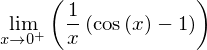

In [19]:
expr = Limit((cos(x) -1) / x, x, 0)
expr

In [20]:
expr.doit()

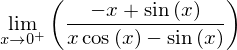

In [20]:
c = Limit((-x + sin(x)) / (x * cos(x) - sin(x)), x, 0)
c

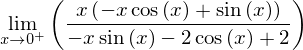

In [21]:
r = Limit(x * (sin(x) - x * cos(x)) / (2*(1-cos(x)) - x * sin(x)), x, 0)
r

In [22]:
print c.doit()
print r.doit()

1/2
4


## Solution of Equations

To solve the equation $x^2 = 1$, first form the equation with the **`Eq()`** SymPy function by defining the left and right hand sides. Then solve the equation by calling the SymPy function **`solve()`**.

In [23]:
solve(Eq(x**2, 1), x)

The same equation could also be expressed as $x^2 - 1 = 0$ and solved as show below:

In [24]:
solve(Eq(x**2 - 1, 0), x)

Since it is a common form to have zero on the right hand side, SymPy allows you to dispense with the **`Eq()`** function call to form the equation and solve the equation directly as follows:

In [25]:
solve(x**2 - 1, x)

Let us now solve the polynomial equation $x^2 - x = 0$

In [26]:
print solve(x**2 - x, x)

[0, 1]


For polynomial equations, **`solve`** prints repeated roots, if any, only once. The function **`roots()`** prints the roots and their frequency.

In [27]:
print solve(x**3 - 6*x**2 + 9*x, x)
print roots(x**3 - 6*x**2 + 9*x, x)

[0, 3]
{0: 1, 3: 2}


Differential equations can be solved using the SymPy function **`dsolve()`**. Let us first represent the differential equation $f''(x) - 2 f'(x) + f(x) = \sin(x)$ as follows using **`Eq()`**, and then solve it using **`dsolve()`**:

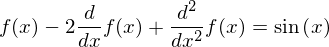

In [28]:
diffeq = Eq(f(x).diff(x, x) - 2 * f(x).diff(x) + f(x), sin(x))
diffeq

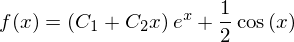

In [29]:
dsolve(diffeq, f(x))

In the above solution $C_1$ and $C_2$ are arbitrary constants of integration which will have to be determined by applying known conditions.